In [2]:
from pylab import *
%matplotlib inline

# Tarea 1 
## Paulina Guzmán García Lascurain

### Definición de  los métodos de integración: 

### a) Método de Euler

Primero vamos a definir nuestra función y condiciones iniciales: 
$$ \frac{dy}{dt} = f(t,y) \\\\ y(t_0)=y_0$$

Partimos de que la tangente a la solución que conocemos está dado por 
$$ y=y_0+f(t_0,y_0)(t-t_0)$$ 

Para el caso de $y_1$: 
$$ y_1=y_0+f(t_0,y_0)(t_1-t_0)$$ 

Y si pensamos que el punto consecuente $y_1$ está lo suficientemente cerca como para aproximar la pendiente entonces podemos calcular de la misma forma el punto $y_2$. Si repetimos ese paso llegaremos a la fórmula más general: 

$$ y_{n+1}=y_n+f(t_n,y_n)h$$ 
Donde $h=t_{n+1}-t_n$

In [3]:
def euler(ec, y_ini, x, h = 0.001):
    
    tiempo = arange(x[0],x[-1] + h, h)
    sol = zeros((len(tiempo),len(y_ini)))
    sol[0,:] = y_ini
    
    for i in xrange(len(tiempo)-1):
            sol[i+1] = sol[i] + ec(sol[i],tiempo[i])*h
            
    return tiempo, sol  

### b) Método de Taylor de 2do orden

Si tenemos que $y'=f(x,y)$ y que $y(x_0)=y_0$ y queremos analizar nuestro método en un intervalo $x_0+h$ con $h$ el paso de integración...

$$ y(x_0+h) = y_0 + hy'(x_0) +\frac{h^2}{2} y''(x_0) + O(h^3)$$ 
donde $O(x_0)$ serán los términos de orden superior ya que truncamos la serie en el segundo orden.

https://mat.iitm.ac.in/home/sryedida/public_html/caimna/ode/taylorseries/taylor.html

In [4]:
# Escribir el método :) 
# Checar mis notas

### c) Método de Runge-Kutta de 2do orden


In [5]:
def rk2(ec,y_ini,x,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(y_ini)))
    sol[0,:] = y_ini
    for i in xrange(len(tiempos)-1): 
        k = h*ec(sol[i,:],tiempos[i])
        f = ec(sol[i,:]+0.5*k,tiempos[i]+0.5*h) #la ec.dif evaluada en la primera entrada y tiempos
        sol[i+1,:]=sol[i,:]+h*f
    return tiempos,sol

### d) Método de Runge-Kutta de 4to orden

$y_{n+1} = y_n +\frac{h}{6}(k_1+2k_2+2k_3+k_4)$

$k_1=f(x_n,y_n)$

$k_2= f(x_n+\frac{h}{2},y_n+\frac{h}{2}k_1)$

$k_3 = f(x_n +\frac{h}{2},y_n + \frac{h}{2}k_2)$

$k_4 = f(x_n +h,y_n + hk_3)$

In [6]:
def rk4(ec,y_ini,x,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(y_ini)))
    sol[0,:] = y_ini
    for i in xrange(len(tiempos)-1): 
        k1 = ec(sol[i,:],tiempos[i])
        k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h) 
        k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h) 
        k4 = ec(sol[i,:]+h*k3,tiempos[i]+h) 
        sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4) 
    return tiempos,sol

## Problema 1:

Vamos primero a hacer una prueba de funcionamiento con los cuatro integradores usando la ecuación diferencial: 

$$ \ddot{x} + 0.5 \dot{x} + \sin{x} = e^{-t} \sin{3t}$$

Y vamos a separarlo en un sistema de ecuaciones: 
$$\dot{x} = y$$

$$ \dot{y} = e^{-t} \sin{3t} - 0.5 \dot{x} - \sin{x}$$

con las condiciones iniciales: $\dot{x}(0)=1$ & $x(0)=0$

In [7]:
def f_prueba(y,t):
    return array([y[1], exp(-t)*sin(3*t) -0.5*y[1] - sin(y[0])])

In [8]:
cond_ini = [0.,1.]
intervalo = [0.,20.]

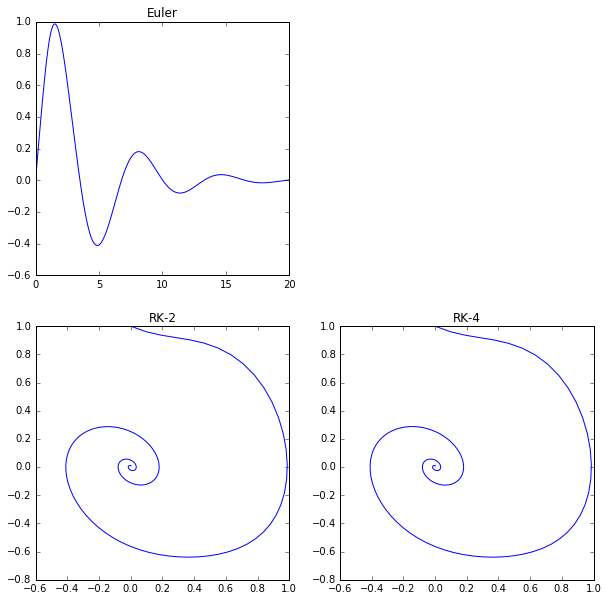

In [9]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(221)
#bx = fig.add_subplot(222) taylor del mal
cx = fig.add_subplot(223)
dx = fig.add_subplot(224)

ax.set_title("Euler")
cx.set_title("RK-2")
dx.set_title("RK-4")

#1a 
t_e,sol_e = euler(f_prueba,cond_ini,intervalo)
ax.plot(t_e,sol_e[:,0],label="Euler")

#1c
t_rk2,sol_rk2 = rk2(f_prueba,cond_ini,intervalo)
cx.plot(sol_rk2[:,0],sol_rk2[:,1],label="R-K 2")

#1d
t_rk4,sol_rk4 = rk4(f_prueba,cond_ini,intervalo)
dx.plot(sol_rk4[:,0],sol_rk4[:,1],label="R-K 4")



## Problema 2 

Queremos encontrar el paso más pequeño para resolver la siguiente ecuación diferencial: 

$$ \dddot{y} + \ddot{y}^2 -3\dot{y}^3 + \cos^2(y) = e^{-t} \sin(3t) $$ 

Con las condiciones iniciales: 

$\ddot{y}(1)=1$ 

$\dot{y}(1)=2$

$y(1)=1$

Primero vamos a hacer el siguiente cambio de variable: 

$\dot{y}=u$ & $\dot{u}=s$

Entonces la ecuación diferencial queda como: 

$$ \dot{s} + s^2 -3u^3 + \cos^2(y) = e^{-t} \sin(3t) $$

Así tenemos el sistema de ecuaciones: 

$\dot{y}=u$

$\dot{u}=s$

$\dot{s} = -s^2 +3u^3 - \cos^2(y) + e^{-t} \sin(3t)$

In [66]:
def fp2(r,t): 
    y = r[0]
    u = r[1]
    s = r[2]
    y_p = r[1]
    u_p = r[2]
    s_p = -r[2]**2 + 3*r[1]**3 - (cos(r[0]))**2 + exp(-t)*sin(3*t)
    
    return array([y_p,u_p,s_p])

In [67]:
c_ini2 = [1.,2.,1.]

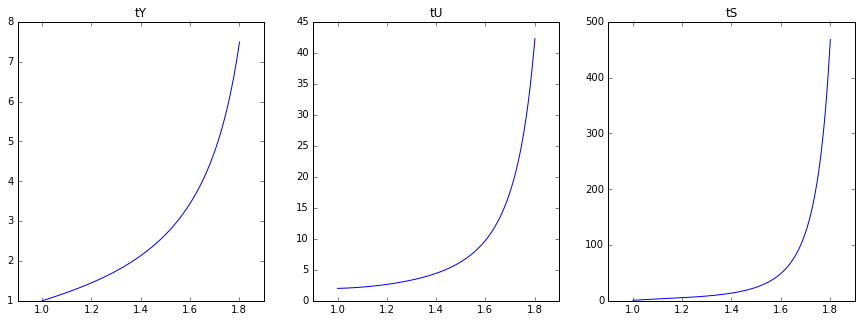

In [113]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(131)
bx = fig.add_subplot(132)
cx = fig.add_subplot(133)

ax.set_title("tY")
bx.set_title("tU")
cx.set_title("tS")

#tY 
t_p2,sol_p2 = rk4(fp2,c_ini2,[1,1.8],h=1.95e-3)
ax.plot(t_p2,sol_p2[:,0],label="tY")

#tU
t_p2,sol_p2 = rk4(fp2,c_ini2,[1,1.8],h=1.95e-3)
bx.plot(t_p2,sol_p2[:,1],label="tU")

#tS
t_p2,sol_p2 = rk4(fp2,c_ini2,[1,1.8],h=1.95e-3)
cx.plot(t_p2,sol_p2[:,2],label="tU")


## Problema 4: 
Tenemos el siguiente sistema de ecuaciones diferenciales: 

$$ \frac{dx}{dt} = 10(y-x)$$

$$ \frac{dy}{dt} = x(28-z)-y $$

$$ \frac{dz}{dt} = xy - \frac{8}{3} z $$

Y vamos a reaizar la integración con el método de Runge-Kutta de cuarto orden.

In [10]:
def fp4(r,t): 
    x = r[0]
    y = r[1]
    z = r[2]
    x_p = 10*(y-x)
    y_p = x*(28-z) - y
    z_p = x*y - (8./3.)*z
    
    return array([x_p,y_p,z_p])

### 4a)

In [11]:
# Condiciones iniciales

x_0 = (rand()-0.5)*10
y_0 = (rand()-0.5)*10
z_0 = (rand()-0.5)*10

c_ini = array([x_0,y_0,z_0])

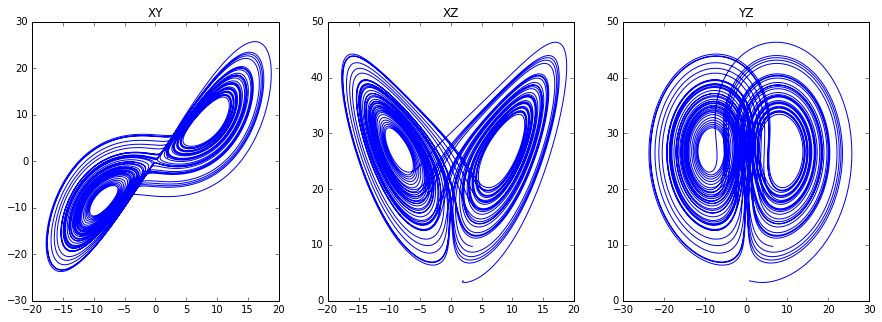

In [12]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(131)
bx = fig.add_subplot(132)
cx = fig.add_subplot(133)

ax.set_title("XY")
bx.set_title("XZ")
cx.set_title("YZ")

#XY 
t_p4,sol_p4 = rk4(fp4,c_ini,[0,50],0.001)
ax.plot(sol_p4[:,0],sol_p4[:,1],label="XY")

#XZ
t_p4,sol_p4 = rk4(fp4,c_ini,[0,50],0.001)
bx.plot(sol_p4[:,0],sol_p4[:,2],label="XZ")

#YZ
t_p4,sol_p4 = rk4(fp4,c_ini,[0,50],0.001)
cx.plot(sol_p4[:,1],sol_p4[:,2],label="YZ")

Cómodamente aquí va la discusión al respecto

### 4b)

In [15]:
#Condiciones iniciales "sumamente aleatorias"
c1 = array([0,5.01,0])
c2 = array([0,5.03,0]) 
c3 = array([0,5.05,0])

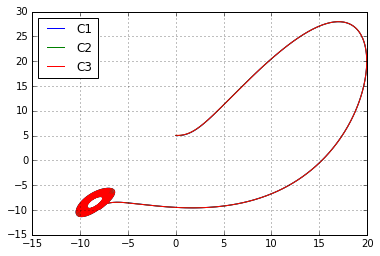

In [16]:
t_p4,sol_p4 = rk4(fp4,c1,[0,10],0.001)
plot(sol_p4[:,0],sol_p4[:,1],label="C1")
t_p4,sol_p4 = rk4(fp4,c2,[0,10],0.001)
plot(sol_p4[:,0],sol_p4[:,1],label="C2")
t_p4,sol_p4 = rk4(fp4,c3,[0,10],0.001)
plot(sol_p4[:,0],sol_p4[:,1],label="C3")
legend(loc='best')
axes().grid(True)

Son muy parecidos :)